Here we have the Titanic dataset. We need to find what factors made people more likely to survive before the sinking of the ship

<h2>Step1:Collecting the data</h2>

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
dataFrame = pd.read_csv('Downloads/TitanicData/file/titanic.csv')

In [3]:
dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Step2: Analysing the data</h2>

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


we do have null values in columns like age,Cabin and Embarked. We have data types like integer, float and also object

In [5]:
# used to know the statistical parameters like mean
dataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import seaborn as sns

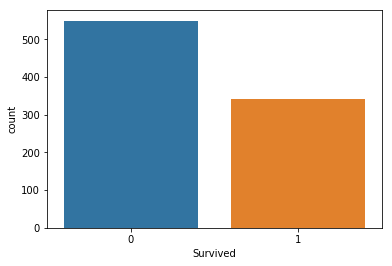

In [7]:
#Count plot of people who survived
sns.countplot(dataFrame['Survived'] )

In the above count plot '0' indicates the no.of people who did not survive and '1' indicates the no.of people who survived. We see that less no.of people survived.

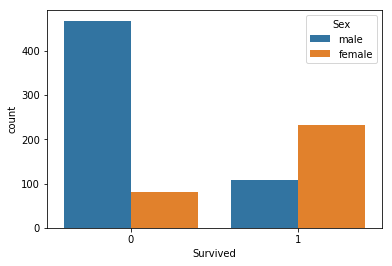

In [12]:
#count plot comparing the gender
sns.countplot(x = 'Survived', data = dataFrame , hue = 'Sex')

From the people who survived there are more no.of females than males.

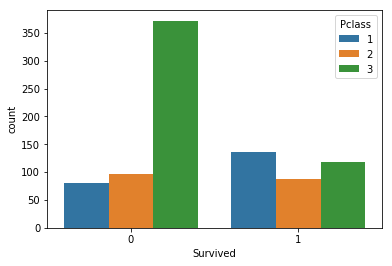

In [13]:
# countplot comparing passenger class
sns.countplot(x= 'Survived', data = dataFrame , hue = 'Pclass')

Third class passengers did not have high survival rate, similar in the case of second class whereas first class passengers had a high survival rate

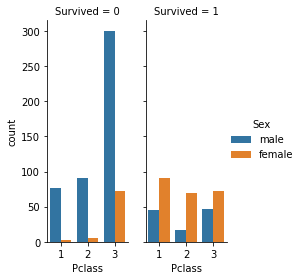

In [18]:
#using catplot
sns.catplot(x = 'Pclass', col = 'Survived', hue = 'Sex',data = dataFrame, height = 4, aspect = 0.4, kind = 'count')

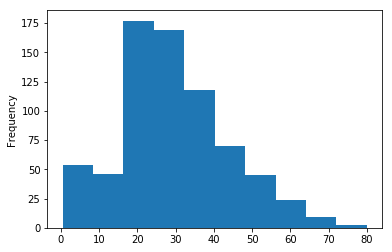

In [25]:
dataFrame['Age'].plot.hist()

We see that there are more passengers in age group of 18-30

<h2>Step3: Data Wrangling</h2>

In [19]:
dataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have 177 null values in Age and 687 null values in Cabin column .Since Cabin column is of very much less use for our analysis and also has highest no.of null values we can just drop it. 

In [32]:
dataFrame.drop('Cabin', axis = 1,inplace = True)

In [33]:
#checking if the cabin column is droped or not
dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
dataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

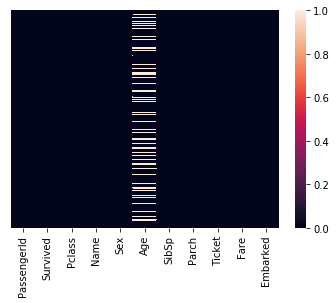

In [35]:
sns.heatmap(dataFrame.isnull(),yticklabels = False )

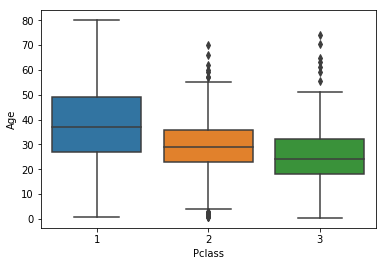

In [36]:
sns.boxplot(x = 'Pclass', y = 'Age', data = dataFrame)

Now we are left with null values in Age and Embarked columns. So, lets drop null values in both the columns

In [37]:
dataFrame.dropna(inplace = True)

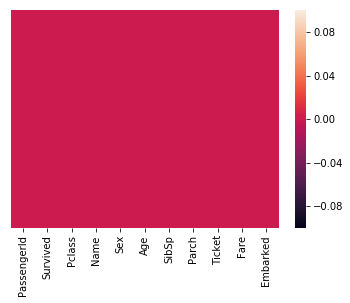

In [39]:
#to check we can use heat map
sns.heatmap(dataFrame.isnull(), yticklabels = False)

In [40]:
pd.get_dummies(dataFrame['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


We can change the data type of this column to int

In [41]:
sex = pd.get_dummies(dataFrame['Sex'],drop_first = True)

In [42]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
pd.get_dummies(dataFrame['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


For embarked column two are enough so , we can drop the first column and store it another variable

In [46]:
embarked = pd.get_dummies(dataFrame['Embarked'], drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [47]:
dataFrame.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [48]:
cls = pd.get_dummies(dataFrame['Pclass'], drop_first = True)
cls.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [50]:
dataFrame = pd.concat([dataFrame,sex,embarked,cls], axis = 1)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [53]:
dataFrame.drop(['Sex','Embarked','Pclass','PassengerId','Ticket','Name'],axis = 1, inplace = True)

In [54]:
dataFrame.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Now, our data set is clean

<h2>Step4: Train and Test</h2>

In [58]:
#split the data for as input and output variables
X = dataFrame.drop('Survived', axis = 1)
Y = dataFrame['Survived']

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model = LogisticRegression()

In [71]:
# to reduce warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
p_val = model.predict(x_test)

In [74]:
p_val

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

<h2>Step5: Accuracy Check</h2>

In [75]:
from sklearn.metrics import classification_report

In [76]:
classification_report(y_test, p_val)

'              precision    recall  f1-score   support\n\n           0       0.76      0.86      0.81        81\n           1       0.78      0.65      0.71        62\n\n   micro avg       0.77      0.77      0.77       143\n   macro avg       0.77      0.75      0.76       143\nweighted avg       0.77      0.77      0.77       143\n'

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, p_val)

array([[70, 11],
       [22, 40]], dtype=int64)

In [79]:
# can be calculated manually using the above confusion matrix or can use the following library
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test, p_val)

0.7692307692307693

We got an accuracy of 76%. Hence we can say, we built a pretty good model